### **Install PADELpy**

In [1]:
! pip install padelpy

     |████████████████████████████████| 20.9 MB 1.5 MB/s 


In [2]:
! wget https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
! unzip fingerprints_xml.zip

--2021-10-09 11:26:12--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2021-10-09 11:26:12--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: ‘fingerprints_xml.zip’

fingerprints_xml.zi 100%[===================>]  10.62K  --.-KB/s    in 0s      

2021-10-09 11:26:12 (114 MB/s) - ‘fingerprints_xml.zip’ saved [10871/10871]

Archive:  fingerprints_xml

In [3]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [4]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [5]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'Substructure': 'SubstructureFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml'}

### **Import dataset**

In [6]:
import pandas as pd

df = pd.read_csv('/content/478concise.csv')
df.head(2)

,ID,pIC50,activity,Canonical SMILES
0,lit1,1.41,inactive,OC(=O)CO/N=C(/c1csc(n1)N)\C(=O)N[C@@H]1C(=O)N(...
1,lit2,1.96,inactive,CCC(C(C)C)C=CC(C1CCC2C1(C)CCC1C2CC=C2C1(C)CCC(...


In [7]:
df.tail(2)

,ID,pIC50,activity,Canonical SMILES
476,lit325,5.98,intermediate,O=c1n(CCCc2ccccc2)sc2c1cccc2
477,lit326,5.99,intermediate,Nc1ccc(cc1)c1cc(nc(c1)C(=O)O)C(=O)O


In [9]:
df2 = pd.concat( [df['Canonical SMILES'],df['ID']], axis=1 )
df2.to_csv('molecule.smi', sep='\t', index=False, header=False)
df2

,Canonical SMILES,ID
0,OC(=O)CO/N=C(/c1csc(n1)N)\C(=O)N[C@@H]1C(=O)N(...,lit1
1,CCC(C(C)C)C=CC(C1CCC2C1(C)CCC1C2CC=C2C1(C)CCC(...,lit2
2,O=C(C(c1ccccc1)C(=O)O)N[C@@H]1C(=O)N2[C@@H]1SC...,lit3
3,O[C@H]1CC[C@]2([C@H](C1(C)C)CC[C@@]1([C@@H]2CC...,lit4
4,CCCc1ccc(cc1)C(=O)CCC(=O)O,CHEMBL1379384
...,...,...
473,SCc1cc(ccc1C(=O)O)c1cccc(c1Cl)Cl,lit322
474,OC(=O)c1ccc(cc1)N1C(=O)S/C(=C\c2ccccn2)/C1=O,lit323
475,O=C(Nc1nc2c([nH]1)cc(cc2)[N+](=O)[O-])CSc1nnc(...,lit324
476,O=c1n(CCCc2ccccc2)sc2c1cccc2,lit325


In [10]:
fp

{'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'Substructure': 'SubstructureFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml'}

### **Fingerprint calculation**

In [11]:
from padelpy import padeldescriptor

fingerprint = 'Substructure'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi', 
                d_file=fingerprint_output_file, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml', 
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [12]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

,Name,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,SubFP11,SubFP12,SubFP13,SubFP14,SubFP15,SubFP16,SubFP17,SubFP18,SubFP19,SubFP20,SubFP21,SubFP22,SubFP23,SubFP24,SubFP25,SubFP26,SubFP27,SubFP28,SubFP29,SubFP30,SubFP31,SubFP32,SubFP33,SubFP34,SubFP35,SubFP36,SubFP37,SubFP38,SubFP39,...,SubFP268,SubFP269,SubFP270,SubFP271,SubFP272,SubFP273,SubFP274,SubFP275,SubFP276,SubFP277,SubFP278,SubFP279,SubFP280,SubFP281,SubFP282,SubFP283,SubFP284,SubFP285,SubFP286,SubFP287,SubFP288,SubFP289,SubFP290,SubFP291,SubFP292,SubFP293,SubFP294,SubFP295,SubFP296,SubFP297,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,lit1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
1,lit3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
2,lit2,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
3,CHEMBL1379384,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
4,lit5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,lit323,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1
474,lit321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
475,lit325,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
476,lit326,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1


In [13]:
df3 = descriptors
df3

,Name,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,SubFP11,SubFP12,SubFP13,SubFP14,SubFP15,SubFP16,SubFP17,SubFP18,SubFP19,SubFP20,SubFP21,SubFP22,SubFP23,SubFP24,SubFP25,SubFP26,SubFP27,SubFP28,SubFP29,SubFP30,SubFP31,SubFP32,SubFP33,SubFP34,SubFP35,SubFP36,SubFP37,SubFP38,SubFP39,...,SubFP268,SubFP269,SubFP270,SubFP271,SubFP272,SubFP273,SubFP274,SubFP275,SubFP276,SubFP277,SubFP278,SubFP279,SubFP280,SubFP281,SubFP282,SubFP283,SubFP284,SubFP285,SubFP286,SubFP287,SubFP288,SubFP289,SubFP290,SubFP291,SubFP292,SubFP293,SubFP294,SubFP295,SubFP296,SubFP297,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,lit1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
1,lit3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
2,lit2,1,1,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
3,CHEMBL1379384,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
4,lit5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,lit323,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1
474,lit321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
475,lit325,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1
476,lit326,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1


### **Define X and Y**

In [15]:
X = descriptors.drop('Name', axis=1)
Y = df['pIC50']


In [20]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,SubFP1,SubFP2,SubFP3,SubFP20,SubFP36,SubFP38,SubFP84,SubFP88,SubFP96,SubFP100,SubFP137,SubFP143,SubFP169,SubFP179,SubFP181,SubFP184,SubFP224,SubFP274,SubFP275,SubFP287
0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,1,1,1
1,1,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0
2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1
4,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,0,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,0,1,1,1
474,0,0,0,1,0,1,0,1,1,1,0,0,1,1,1,1,0,1,1,0
475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
476,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,1,1,1


### **Data splitting**

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
X_train.shape, X_test.shape

((382, 20), (96, 20))

### **Feature importance in linear regression model**

Feature: 0, Score: -0.05573
Feature: 1, Score: 0.00085
Feature: 2, Score: -0.19460
Feature: 3, Score: -413432598029950.50000
Feature: 4, Score: 1.11073
Feature: 5, Score: 413432598029952.56250
Feature: 6, Score: 0.48002
Feature: 7, Score: -0.37816
Feature: 8, Score: -0.76484
Feature: 9, Score: -0.02315
Feature: 10, Score: 0.02538
Feature: 11, Score: 0.31808
Feature: 12, Score: -0.46309
Feature: 13, Score: -0.27211
Feature: 14, Score: 0.33385
Feature: 15, Score: -0.16746
Feature: 16, Score: -0.31641
Feature: 17, Score: 0.36826
Feature: 18, Score: 0.05769
Feature: 19, Score: 0.46728


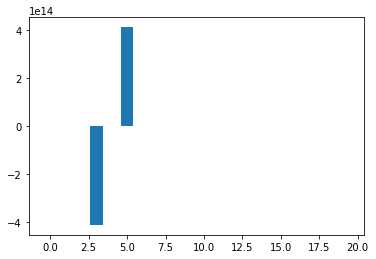

In [23]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define the model
model = LinearRegression()
# fit the model
model.fit(X, Y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([X for X in range(len(importance))], importance)
pyplot.show()

### **Feature importance in decision tree model**


Feature: 0, Score: 0.07834
Feature: 1, Score: 0.06414
Feature: 2, Score: 0.06079
Feature: 3, Score: 0.01067
Feature: 4, Score: 0.03759
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.06475
Feature: 7, Score: 0.07814
Feature: 8, Score: 0.06332
Feature: 9, Score: 0.03725
Feature: 10, Score: 0.03822
Feature: 11, Score: 0.05589
Feature: 12, Score: 0.05202
Feature: 13, Score: 0.02699
Feature: 14, Score: 0.11460
Feature: 15, Score: 0.03286
Feature: 16, Score: 0.04833
Feature: 17, Score: 0.01258
Feature: 18, Score: 0.03216
Feature: 19, Score: 0.09138


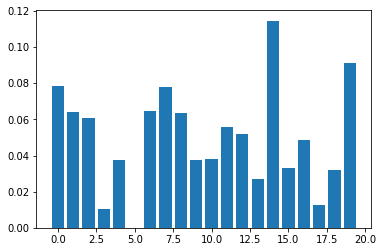

In [29]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([X for X in range(len(importance))], importance)
pyplot.show()

### **Feature importance in random forest model**

Feature: 0, Score: 0.06517
Feature: 1, Score: 0.05921
Feature: 2, Score: 0.05791
Feature: 3, Score: 0.02840
Feature: 4, Score: 0.02414
Feature: 5, Score: 0.01629
Feature: 6, Score: 0.06072
Feature: 7, Score: 0.07109
Feature: 8, Score: 0.05642
Feature: 9, Score: 0.04925
Feature: 10, Score: 0.05021
Feature: 11, Score: 0.04885
Feature: 12, Score: 0.05331
Feature: 13, Score: 0.03883
Feature: 14, Score: 0.09889
Feature: 15, Score: 0.03581
Feature: 16, Score: 0.02686
Feature: 17, Score: 0.02176
Feature: 18, Score: 0.04337
Feature: 19, Score: 0.09351


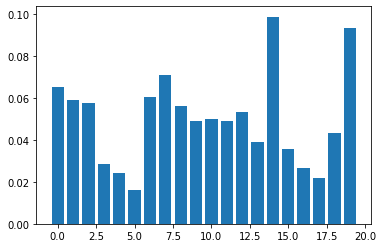

In [30]:
from sklearn.ensemble import RandomForestRegressor 
from matplotlib import pyplot

model = RandomForestRegressor()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([X for X in range(len(importance))], importance)
pyplot.show()


In [ ]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=500)
n_scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.871 (0.049)


### **Feature importance in extreme gradient booster model**

[11:40:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.04286
Feature: 1, Score: 0.02325
Feature: 2, Score: 0.04166
Feature: 3, Score: 0.05573
Feature: 4, Score: 0.03301
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.03894
Feature: 7, Score: 0.03548
Feature: 8, Score: 0.06389
Feature: 9, Score: 0.04358
Feature: 10, Score: 0.03679
Feature: 11, Score: 0.06835
Feature: 12, Score: 0.06127
Feature: 13, Score: 0.06157
Feature: 14, Score: 0.16108
Feature: 15, Score: 0.03005
Feature: 16, Score: 0.02462
Feature: 17, Score: 0.02938
Feature: 18, Score: 0.04148
Feature: 19, Score: 0.10701


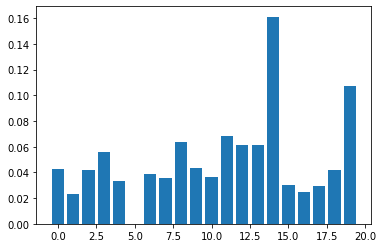

In [31]:
from xgboost import XGBRegressor
from matplotlib import pyplot

# define the model
model = XGBRegressor()

# fit the model
model.fit(X, Y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([X for X in range(len(importance))], importance)
pyplot.show()